<a href="https://colab.research.google.com/github/RonnyGuevara/Digital-image-processing/blob/main/TP5/Pr%C3%A1ctica_5_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 5:  Transformada de Fourier

##Presentado por: Ronny Guevara

## Objetivo General
Descomponer una imagen en sus componentes seno y coseno aplicando la transformada de Fourier 
## Objetivos Específicos
*   Representar la imagen en el dominio de frecuencia mediante la transformada de Fourier
*   Reconstruir una imagen mediante la transformada inversa de Fourier
*   Visualización de resultados en una interfaz amigable con el usuario

## Descripción del práctico:
Las actividades propuestas son:

Cargar una imagen

*   Generar la TF directa de la imagen y ver su espectro
*   A partir del espectro generado mediante la TF inversa obtener la imagen
*   Debe permitir guardar el espectro de amplitud de una imagen en un bitmap
*   Debe permitir cargar el espectro de imagen a partir de un bitmap

In [39]:
#Librerías a utilizar
import imageio as io
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import time
from google.colab import files

In [40]:
#Función que permite leer una imagen sin limitación de UNIT8
def get_image(dir):
  image = io.imread(dir)
  image = image.astype(np.int)
  return image

#Función que permite plotear la imagen
def plot2_image(image,Imagen, cmap=None):
  plt.figure(figsize=(100,100)) 
  plt.figure()
  plt.title(Imagen)
  plt.imshow(image,cmap=cmap)
  plt.colorbar()
  plt.grid(False)
  plt.show()

#Copia de la imagen Original
def image_copy(image):
  work_image=np.copy(image)
  return work_image 

#Información de la imagen
def image_info(image):
  print('This image is', image.dtype)
  print('with dimensions', image.shape)

#Normalización de las imágenes
def image_norm(image):
  norm=image.astype(np.float64)/255
  return norm

#Conversión RGB2YIQ
def image_RGB2YIQ(image):
  matrixYIQ=np.array([[0.299,0.587,0.144],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
  YIQ=np.dot(image,matrixYIQ)
  y = YIQ[:,:,0]
  i = YIQ[:,:,1]
  q = YIQ[:,:,2]
  y = np.clip(y, 0 ,1)
  q = np.clip(q,-0.5957 , 0.5957 )
  i = np.clip(i, -0.5226 , 0.5226) 
  return y, i, q

La transformada de Fourier es una importante herramienta en procesamiento de imágenes la cual es utilizada para descomponer una imagen en sus componentes seno y coseno. La salida de la transformación representa la imagen en el dominio de frecuencia. La transformada de Fourier se utiliza en un amplio rango de aplicaciones, tales como análisis de imágenes, filtrado de imágenes, reconstrucción de imágenes y comprensión de imágenes 

In [41]:
#Función que permite obtener la transformada de Fourier
def fft_imagen(y):
  fc = np.fft.fftshift(np.fft.fft2(y)) #numpy
  mag = np.abs(fc)
  mag = np.log(mag + 1)
  phase = np.angle(fc) 
  return mag, phase

#Función que permite obtener la transformada inversa de Fourier
def ifft_imagen(mag, phase):
  image_final=(np.power(np.e, mag) - 1) * (np.cos(phase) + np.sin(phase) * 1j)
  image_final=np.abs(fftpack.ifft2(fftpack.ifftshift(image_final)))
  image_final=np.clip(image_final,0 ,255)
  return image_final

def plot(name):
  image1=get_image(name)
  work_image1=image_norm(image1)
  y1, i1, q1 = image_RGB2YIQ(work_image1)
  mag1, phase1 = fft_imagen(y1)
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(10,10)
  axes[0].imshow(y1,'gray')
  axes[1].imshow(mag1,'gray')
  axes[2].imshow(phase1,'gray')
  plt.show()

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 7200x7200 with 0 Axes>

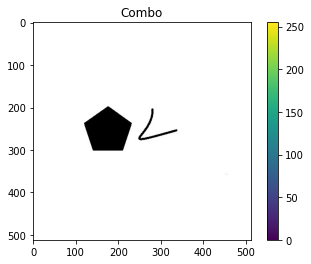

In [43]:
#@title Selecciona la imagen { run: "auto" }
Cuadrado='/content/drive/MyDrive/Colab Notebooks/Cuadrado.jpg'
Circulo='/content/drive/MyDrive/Colab Notebooks/Circulo.jpg'
Hexagono='/content/drive/MyDrive/Colab Notebooks/Hexagono.jpg'
Triangulo='/content/drive/MyDrive/Colab Notebooks/Triangulo.jpg'
Combo='/content/drive/MyDrive/Colab Notebooks/Combo.jpg'
Loro='/content/drive/MyDrive/Colab Notebooks/loro.jpg'
Imagen = 'Combo' #@param ["Cuadrado", "Circulo", "Hexagono","Triangulo","Combo","Loro"]

if Imagen == 'Cuadrado':
  image = get_image(Cuadrado)
  plot2_image(image, 'Cuadrado')
elif Imagen == 'Circulo':
  image = get_image(Circulo)
  plot2_image(image, 'Circulo')
elif Imagen == 'Hexagono':
  image = get_image(Hexagono)
  plot2_image(image, 'Hexagono')
elif Imagen == 'Triangulo':
  image = get_image(Triangulo)
  plot2_image(image, 'Triangulo')
elif Imagen == 'Combo':
  image = get_image(Combo)
  plot2_image(image, 'Combo')
elif Imagen == 'Loro':
  image = get_image(Loro)
  plot2_image(image, 'Loro')

In [44]:
#Proceso de copia de la imagen y visualización de información
work_image=image_copy(image)
image_info(work_image)

This image is int64
with dimensions (512, 512, 3)


<Figure size 7200x7200 with 0 Axes>

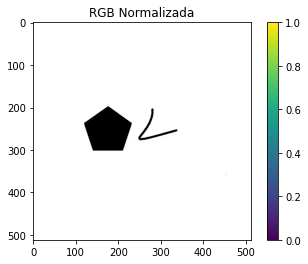

<Figure size 7200x7200 with 0 Axes>

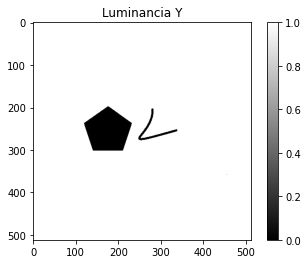

In [45]:
#Normalización de la imagen y conversión del espacio RGB a YIQ
work_image=image_norm(work_image)
plot2_image(work_image,'RGB Normalizada',cmap=None)
y, i, q = image_RGB2YIQ(work_image)
plot2_image(y,'Luminancia Y',cmap='gray')

##Resultados

Desarrollo del aplicativo que permite: 


1. Visualización del espectro de 5 figuras diferentes
2. Visualización de los resultados de la transformada de Fourier
3.   Guardado del espectro de magnitud y descarga automática para que el usuario pueda realizar la modificación
4.   Carga del espectro modificado 
5.   Aplicación y visualización de los resultados mediante la transformada inversa de Fourier





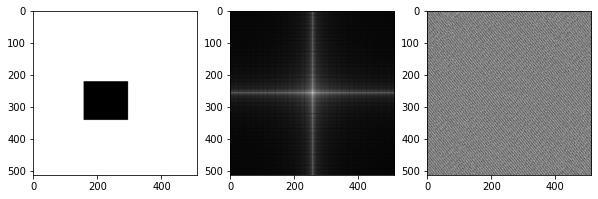

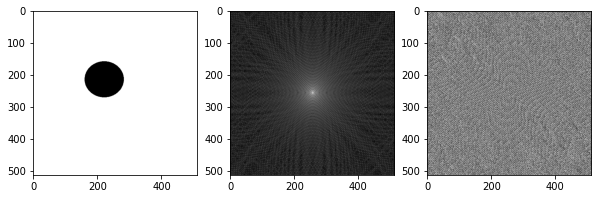

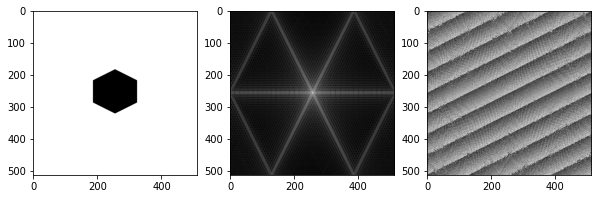

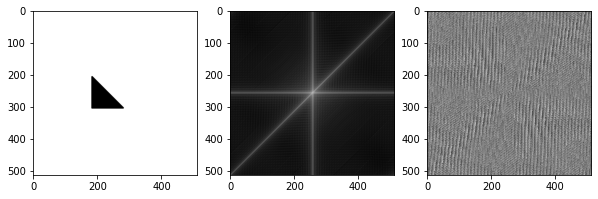

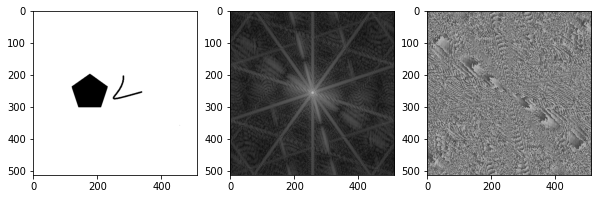

In [46]:
plot(Cuadrado)
plot(Circulo)
plot(Hexagono)
plot(Triangulo)
plot(Combo)

In [49]:
button = widgets.ToggleButtons(options=['TTF', 'save_spectrum', 'load_spectrum', 'iTTF'],
    description='Ejercicio:',
    #disabled=False,
    button_style='success',
    )

output = widgets.Output()
def on_button_clicked(b):
  with output:
    #clear_output()
    if button.value == 'TTF':
      clear_output()
      mag, phase = fft_imagen(y)
      fig, axes = plt.subplots(1, 3)
      fig.set_size_inches(15,10)
      axes[0].imshow(y,'gray')
      axes[1].imshow(mag,'gray')
      axes[2].imshow(phase,'gray')
      plt.show()

    elif button.value == 'save_spectrum':
      mag, phase = fft_imagen(y)
      factor = 255/ np.max(mag)
      io.imwrite('mag_spectrum.bmp', np.uint8(np.clip(mag * factor, 0., 255.)), 'bmp')
      io.imwrite('phase spectrum.tif', phase, 'tif') #TIF es un formato de archivo informático para almacenar imágenes de mapa de bits
      files.download('mag_spectrum.bmp')

    elif button.value == 'load_spectrum': 
      print('Por favor guardar el espectro con el nombre: modified_image')
      print('Tiene un tiempo de 20 segundos')
      time.sleep(20)
      #uploaded = files.upload()      
      #time.sleep(5)

    elif button.value == 'iTTF':
      clear_output()
      mag, phase = fft_imagen(y)
      factor = 255/ np.max(mag)
      image_mag =io.imread('modified_image.bmp', as_gray=True)
      image_mag =image_mag/factor
      image_phase = io.imread('phase spectrum.tif')
      image_final=ifft_imagen(image_mag, image_phase)
      fig, axes = plt.subplots(1, 3)
      fig.set_size_inches(15,10)
      axes[0].imshow(y,'gray')
      axes[1].imshow(image_mag,'gray')
      axes[2].imshow(image_final, 'gray')
      plt.show()

button.observe(on_button_clicked, 'value')
display(button, output)

ToggleButtons(button_style='success', description='Ejercicio:', options=('TTF', 'save_spectrum', 'load_spectru…

Output()

In [50]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="TTF")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
      clear_output()
      mag, phase = fft_imagen(y)
      fig, axes = plt.subplots(1, 3)
      fig.set_size_inches(15,10)
      axes[0].imshow(y,'gray')
      axes[1].imshow(mag,'gray')
      axes[2].imshow(phase,'gray')
      plt.show()

button.on_click(on_button_clicked)
display(button, output)

Button(description='TTF', style=ButtonStyle())

Output()

####4. Análisis de los resultados:

*   Se crea la función fft_imagen que permite obtener la magnitud y fase de cada pixel de la luminancia de una imagen
*   
